In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True)
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance

## **READ THE DATASET**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab/dataset.csv")
df.head(5)

<ipython-input-3-b63db107cad2>:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab/dataset.csv")


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


## **DATA TYPES IN DATASET**

In [4]:
df.dtypes

,0
Loan ID,object
Customer ID,object
Loan Status,object
Current Loan Amount,int64
Term,object
Credit Score,float64
Years in current job,object
Home Ownership,object
Annual Income,float64
Purpose,object


## **NO. OF ROWS AND COULUMS IN DATASET**

In [5]:
df.shape

(111107, 19)

## **DUPLICATE ROWS IN DATASET**

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5869, 19)


In [7]:
df.count()

,0
Loan ID,111107
Customer ID,111107
Loan Status,111107
Current Loan Amount,111107
Term,111107
Credit Score,89769
Years in current job,106414
Home Ownership,111107
Annual Income,89769
Purpose,111107


# **1. REMOVE DUPLICATE ROWS**

In [8]:
df = df.drop_duplicates()
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [9]:
df.count()

,0
Loan ID,105238
Customer ID,105238
Loan Status,105238
Current Loan Amount,105238
Term,105238
Credit Score,83900
Years in current job,100788
Home Ownership,105238
Annual Income,83900
Purpose,105238


# **2. NULL OR EMPTY VALUES DETECTED** **Where ZEROS its Means there is any value** .. **But Empty or Null Like 21338,4450 Etc..**




In [10]:
print(df.isnull().sum())

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4450
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    56235
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      218
Tax Liens                          11
dtype: int64


## **HERE WHITE SHOW EMPTY OR NULL VALUES**

<Axes: >

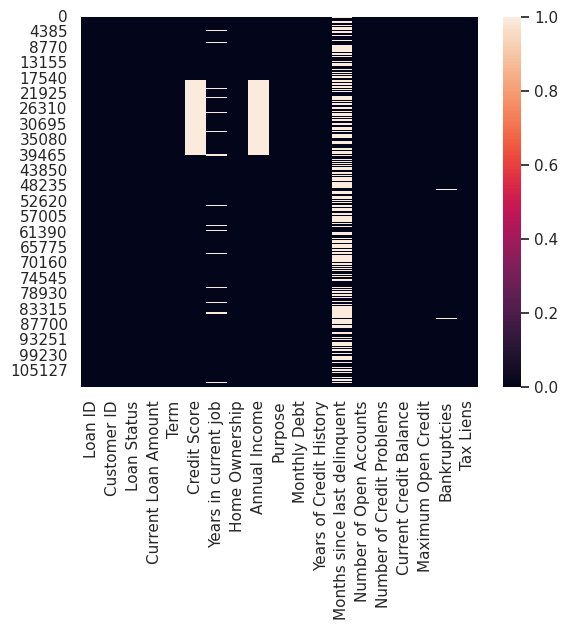

In [11]:
sns.heatmap(df.isnull())

# **2. TAKE MEAN FOR NUMERICAL VALUES TO REPLACE WITH NULL OR EMPTY VALUES**

In [12]:
hf1=df

In [13]:
hf1['Credit Score'].min()

585.0

In [14]:
hf1['Credit Score'].max()

7510.0

In [15]:
hf1['Credit Score'].unique()

array([7280., 7330., 7240., 7400., 6860., 7420., 6630., 7360., 6720.,
       7010., 7310., 6850., 6280., 7470., 7200., 7320., 6820., 7230.,
       6740., 7350., 7430., 7170., 7370., 7180., 7440., 6680., 7130.,
       6510., 6970., 6950., 6410., 6610., 7160., 7260., 7290., 6620.,
       7480., 6830., 7080., 7380., 6320., 7490., 7140., 7340., 6710.,
       7040., 7500., 6880., 6990., 6590., 6110., 6300., 6520., 6450.,
       7460., 6100., 7060., 6780., 7020., 7090., 6840., 6600., 6220.,
       6800., 6920., 7000., 7050., 7390., 6770., 6810., 7120., 6750.,
       6910., 6930., 6570., 6870., 7220., 6480., 7070., 6290., 6660.,
       6980., 6260., 6390., 7210., 7450., 7250., 6640., 7410., 6140.,
       6560., 6760., 6730., 7100., 7190., 6890., 7300., 6900., 6960.,
       7030., 7510., 6940., 7150., 6700., 6530., 6270., 7110., 6440.,
       6420., 6010., 6350., 6670., 5930., 6790., 6490., 7270., 5890.,
       6180., 6690., 6330., 6380., 6230., 6650., 6210., 6580., 6060.,
       6130., 6080.,

## **REPLACE MEAN OF NUMERICAL VALUES WITH EMPTY OR NULL**

In [16]:
hf1['Credit Score'].fillna(hf1['Credit Score'].mean(), inplace = True)

<ipython-input-16-23cda097031d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf1['Credit Score'].fillna(hf1['Credit Score'].mean(), inplace = True)


## **HERE NULL OR EMPTY VALUES OF CREDIT SCORE IS REPLACED**

In [17]:
hf1.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,4450
Home Ownership,0
Annual Income,21338
Purpose,0


# **IN THIS GRAPH NULL VALUES OF CREDIT SCORE IS REPLACED**

<Axes: >

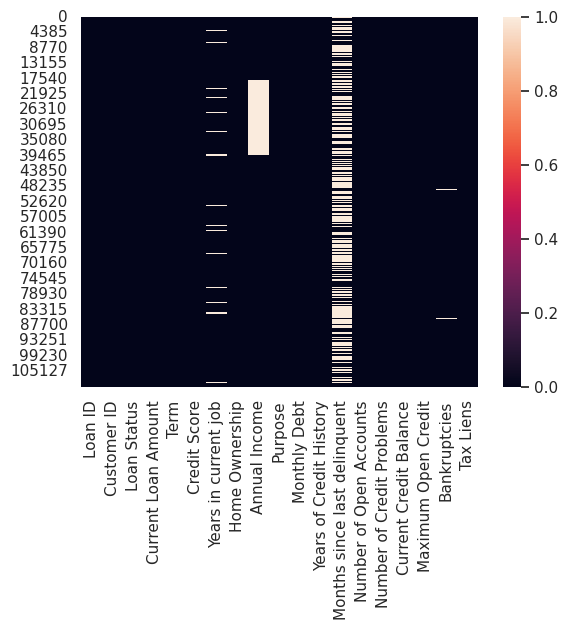

In [18]:
sns.heatmap(hf1.isnull())

In [19]:
hf2=hf1


# **2. DISPLAY THE HF2 WITH NO NULL VALUE OF CREDIT SCORE**

In [20]:
hf2

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


# **2. TAKE MODE FOR CATEGORICAL VALUES TO REPLACE THIER NULL OR EMPTY** **I Show output for Only "Years in current job"** .. **Other outputs Hided**

In [21]:
hf2['Years in current job'].mode()

,Years in current job
0,10+ years


In [22]:
hf2['Years in current job'].fillna(hf2['Years in current job'].mode()[0], inplace = True)

<ipython-input-22-808dd0e0e492>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf2['Years in current job'].fillna(hf2['Years in current job'].mode()[0], inplace = True)


In [23]:
hf2.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Annual Income,21338
Purpose,0


In [24]:
hf3=hf2

In [25]:
hf3['Annual Income'].min()

4033.0

In [26]:
hf3['Annual Income'].max()

8713547.0

In [27]:
hf3['Annual Income'].fillna(hf3['Annual Income'].mean(), inplace = True)

<ipython-input-27-50f036847310>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf3['Annual Income'].fillna(hf3['Annual Income'].mean(), inplace = True)


In [28]:
hf3.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Annual Income,0
Purpose,0


# **2. HERE TAKE MEAN of MONTHS SINCE LAST DELINQUENT** **AND SAME FOR OTHERS** **I write code for them but Hide there Outputs**

In [29]:
hf4=hf3
hf4['Months since last delinquent'].min()
hf4['Months since last delinquent'].max()
hf4['Months since last delinquent'].fillna(hf4['Months since last delinquent'].mean(), inplace = True)
hf4.isnull().sum()

<ipython-input-29-3ddfc000afce>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf4['Months since last delinquent'].fillna(hf4['Months since last delinquent'].mean(), inplace = True)


,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Annual Income,0
Purpose,0


In [30]:
hf5=hf4
hf5['Bankruptcies'].min()
hf5['Bankruptcies'].max()
hf5['Bankruptcies'].fillna(hf5['Bankruptcies'].mean(), inplace = True)
hf5.isnull().sum()

<ipython-input-30-86392c1fc699>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf5['Bankruptcies'].fillna(hf5['Bankruptcies'].mean(), inplace = True)


,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Annual Income,0
Purpose,0


In [31]:
hf6=hf5
hf6['Tax Liens'].min()
hf6['Tax Liens'].max()
hf6['Tax Liens'].fillna(hf6['Tax Liens'].mean(), inplace = True)
hf6.isnull().sum()

<ipython-input-31-b3dbc0ab0cda>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf6['Tax Liens'].fillna(hf6['Tax Liens'].mean(), inplace = True)


,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Annual Income,0
Purpose,0


# **3. THIS CODE DETECT THE OUTLIERS FOR EACH ITEMS WITH GRAPH**

<Axes: xlabel='Current Loan Amount'>

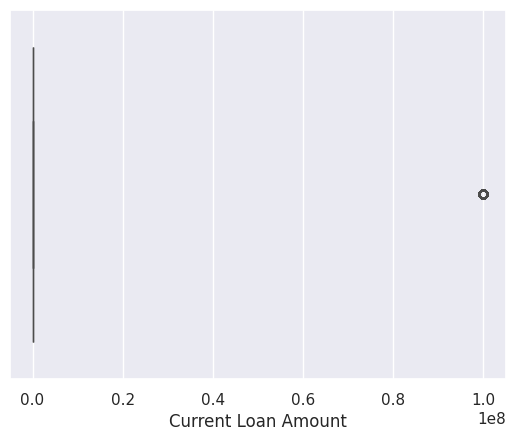

In [32]:
sns.boxplot(x=hf6['Current Loan Amount'])


<Axes: xlabel='Annual Income'>

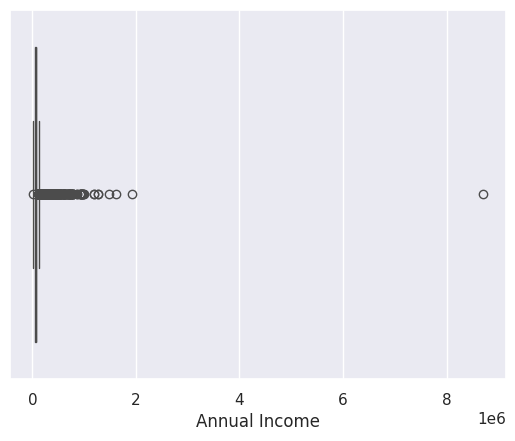

In [33]:
sns.boxplot(x=hf6['Annual Income'])

<Axes: xlabel='Years of Credit History'>

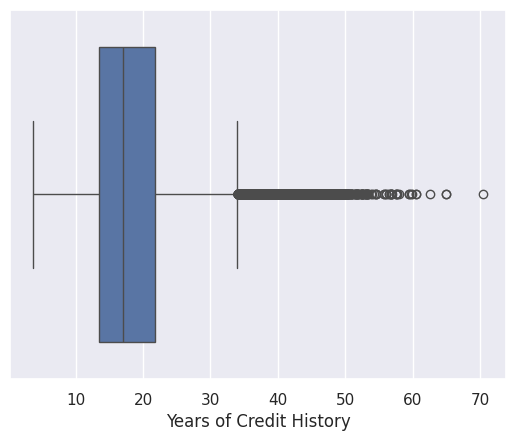

In [34]:
sns.boxplot(x=hf6['Years of Credit History'])

<Axes: xlabel='Months since last delinquent'>

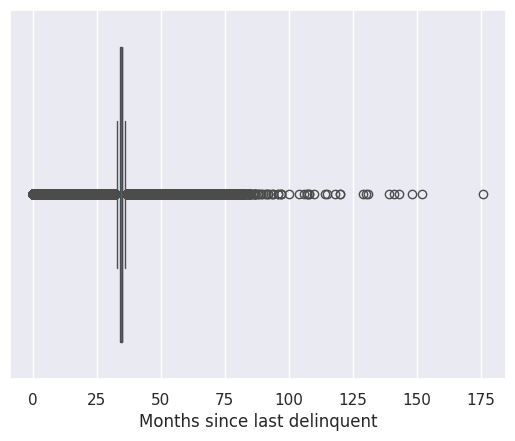

In [35]:
sns.boxplot(x=hf6['Months since last delinquent'])

<Axes: xlabel='Number of Open Accounts'>

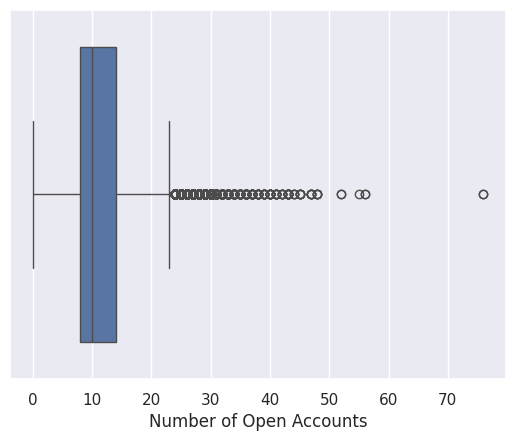

In [36]:
sns.boxplot(x=hf6['Number of Open Accounts'])

<Axes: xlabel='Bankruptcies'>

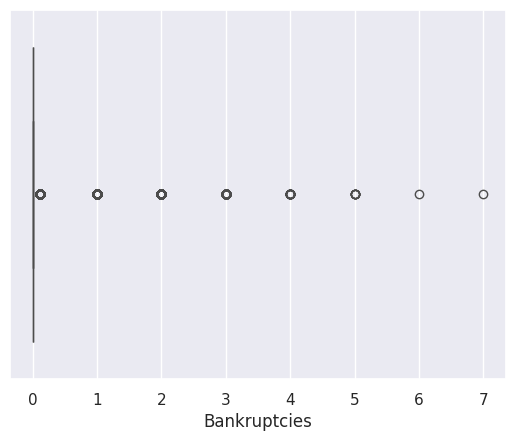

In [37]:
sns.boxplot(x=hf6['Bankruptcies'])

# **3. THIS CODE SHOW THE PERCENTAGE WISE GRAPH OF OUTLIERS**

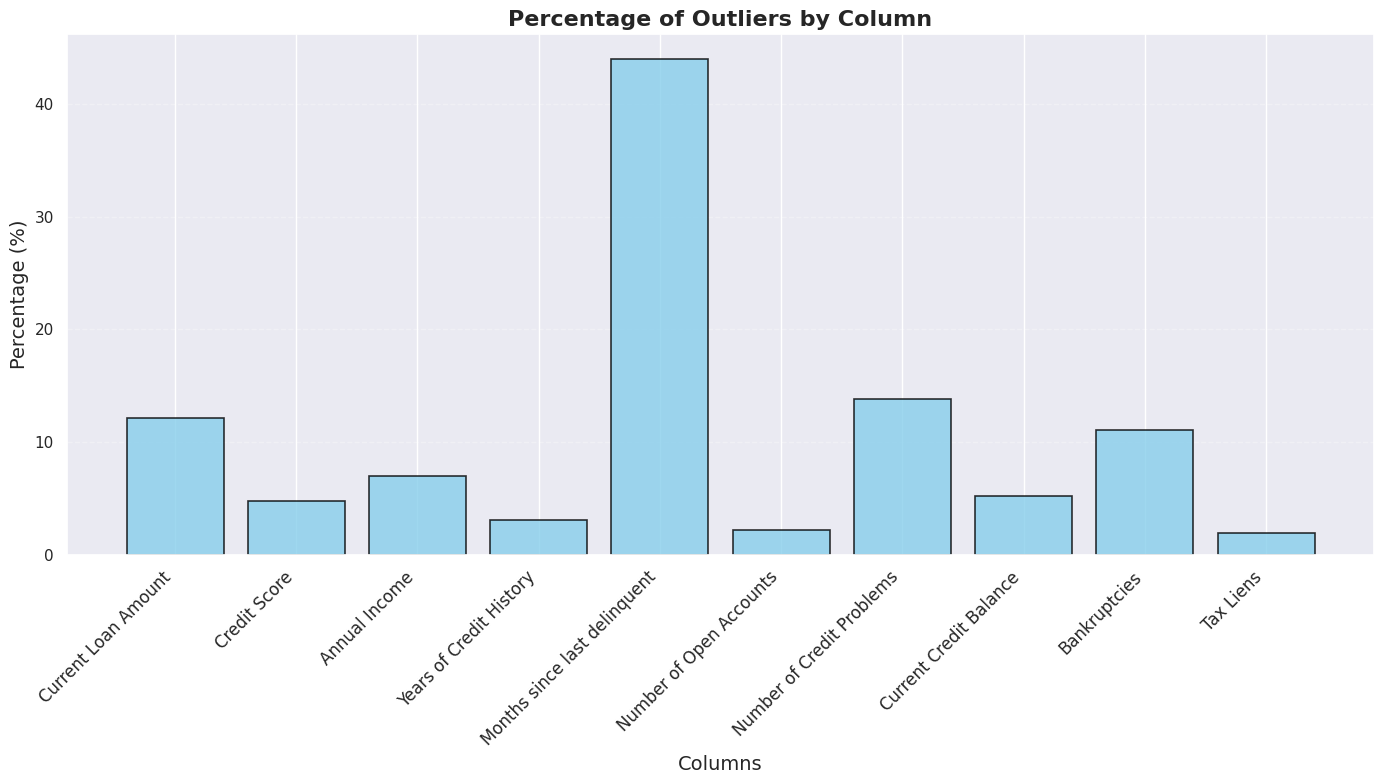

In [38]:
def calculate_outlier_percentage(data, column):
    """Calculates the percentage of outliers in a given column using IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    return outlier_percentage
# Get numerical columns for outlier analysis
numerical_cols = hf6.select_dtypes(include=np.number).columns
outlier_data = []
for column in numerical_cols:
    percentage = calculate_outlier_percentage(hf6, column) # Using hf6 here
    outlier_data.append({'Column': column, 'Outlier Percentage (%)': percentage})
# Create a new DataFrame from the outlier data
outlier_summary_df = pd.DataFrame(outlier_data)
# Now you can create the bar plot using the new DataFrame
plt.figure(figsize=(14, 8))
bars = plt.bar(outlier_summary_df['Column'], outlier_summary_df['Outlier Percentage (%)'],
               color='skyblue', alpha=0.8, edgecolor='black', linewidth=1.2)

plt.title('Percentage of Outliers by Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# **3. CODE REPLACE THE OUTLIERS WITH MEDIAN AND DISPLAY GRAPH**

<ipython-input-39-25eb76ed2564>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14219.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].median()
<ipython-input-39-25eb76ed2564>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11025.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].median()


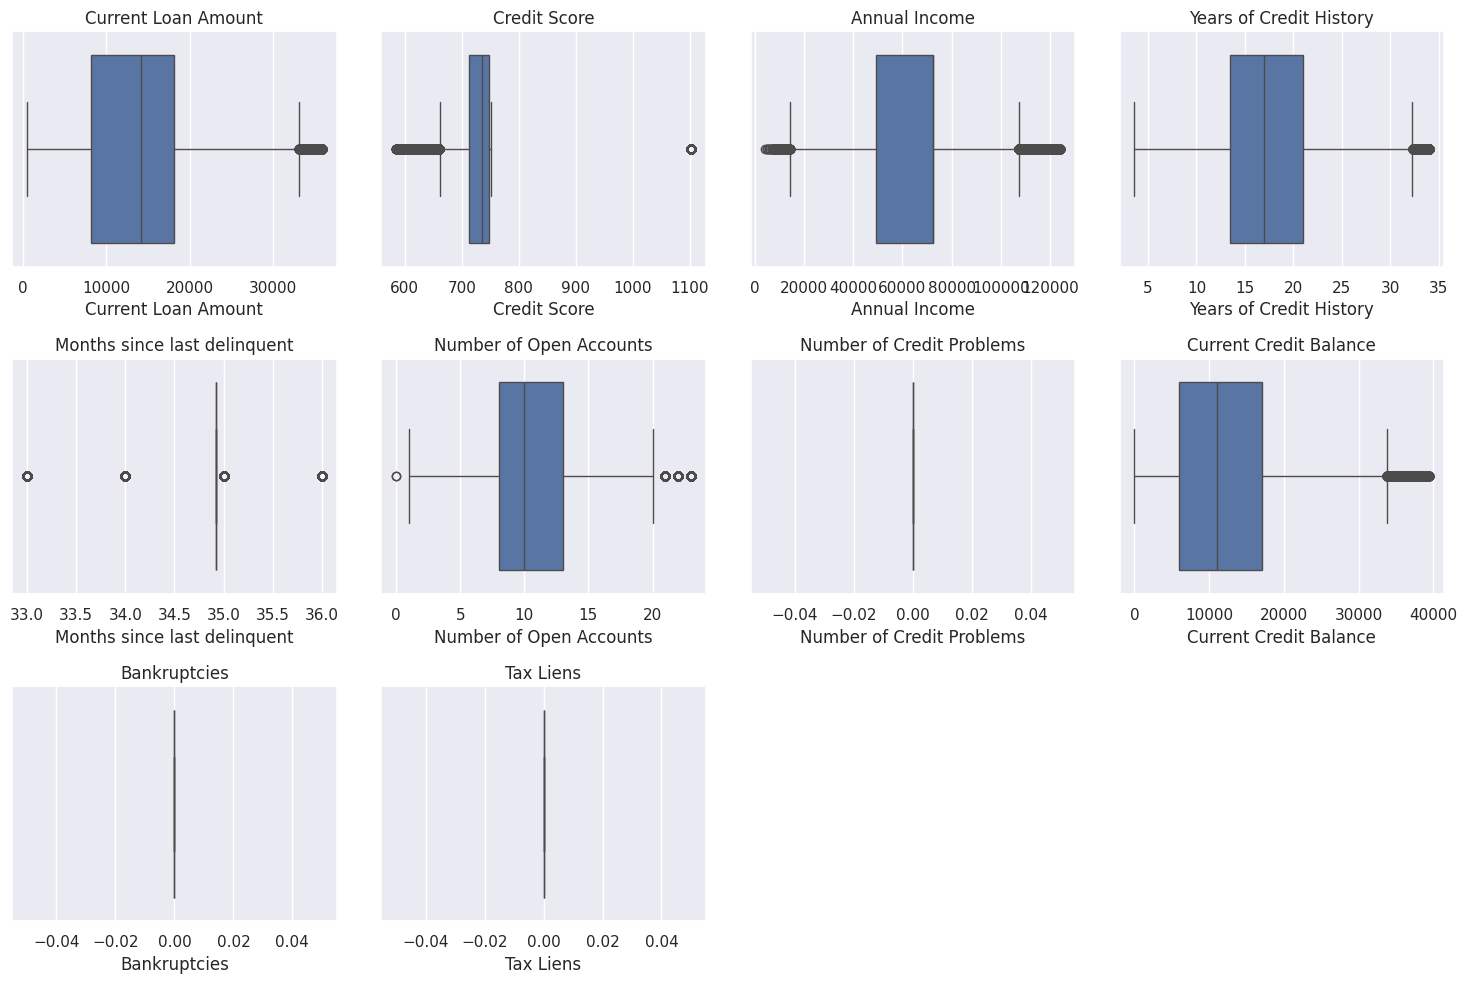

In [39]:
def replace_outliers_with_median(data, column):
    """Replaces outliers in a given column with the median value."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].median()
  return data
# Get numerical columns for outlier treatment
numerical_cols = hf6.select_dtypes(include=np.number).columns
# Replace outliers in each numerical column
for column in numerical_cols:
    hf6 = replace_outliers_with_median(hf6, column)
# Create box plots to visualize the changes
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=hf6[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# **1. HISTOGRAM OF DATASET AFTER SOLVING ALL QUESTIONS**

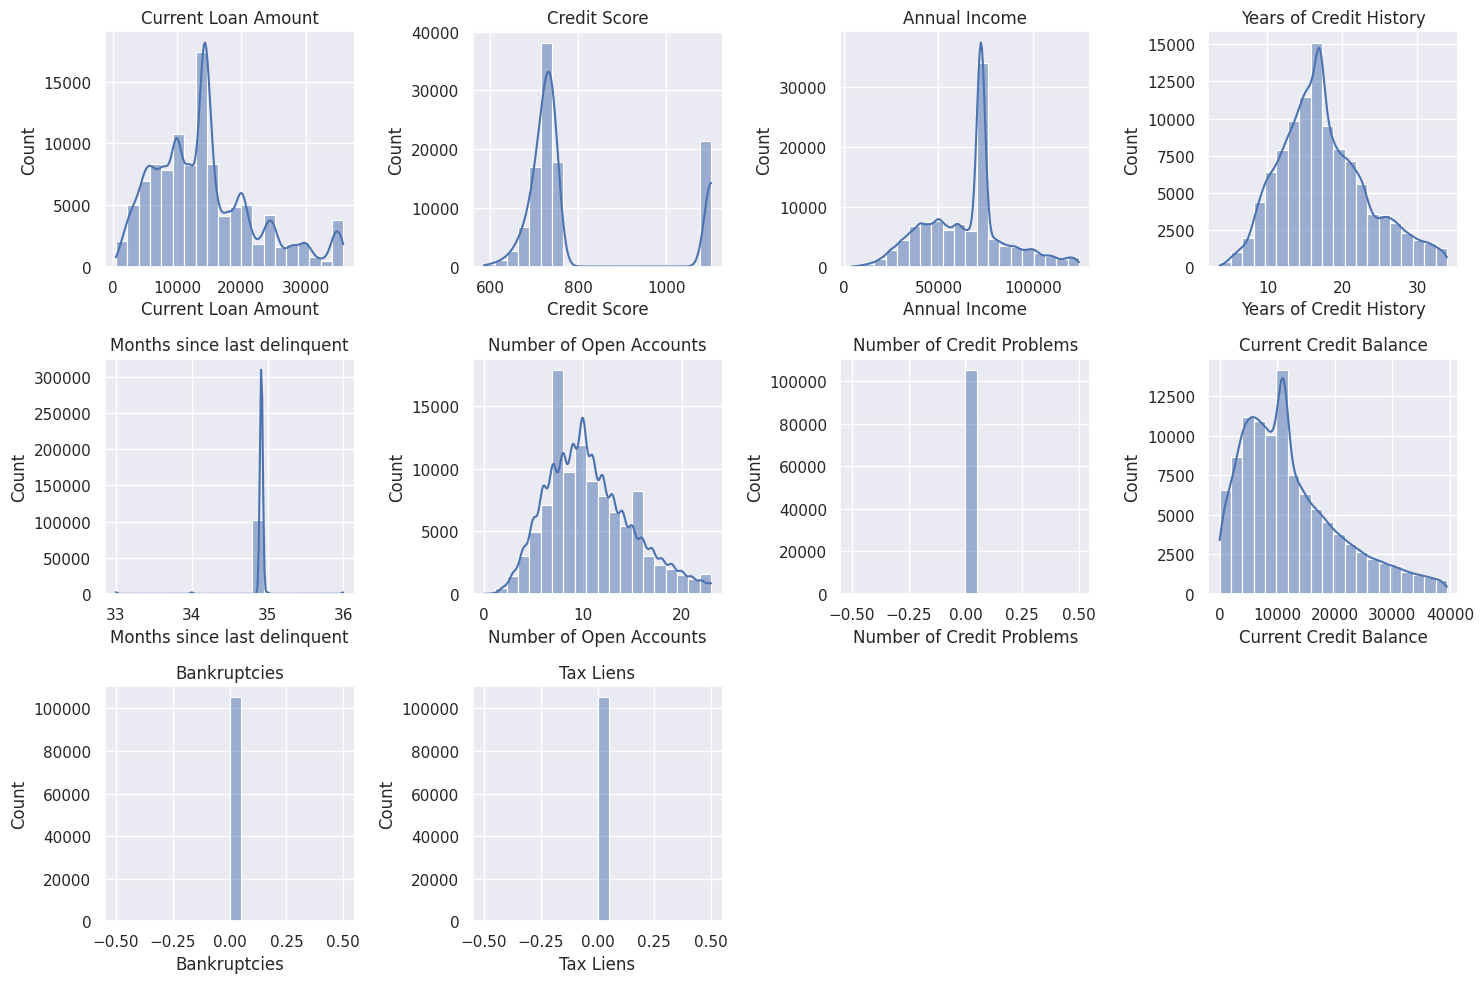

In [40]:
numerical_cols = hf6.select_dtypes(include=np.number).columns
# Create histograms
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, column in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)  # Adjust subplot layout as needed
    sns.histplot(hf6[column], bins=20, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# **1. SCATTER PLOTS FOR ALL PAIRS OF NUMERICAL COLUMNS AFTER SOLVING ALL QUESTIONS**

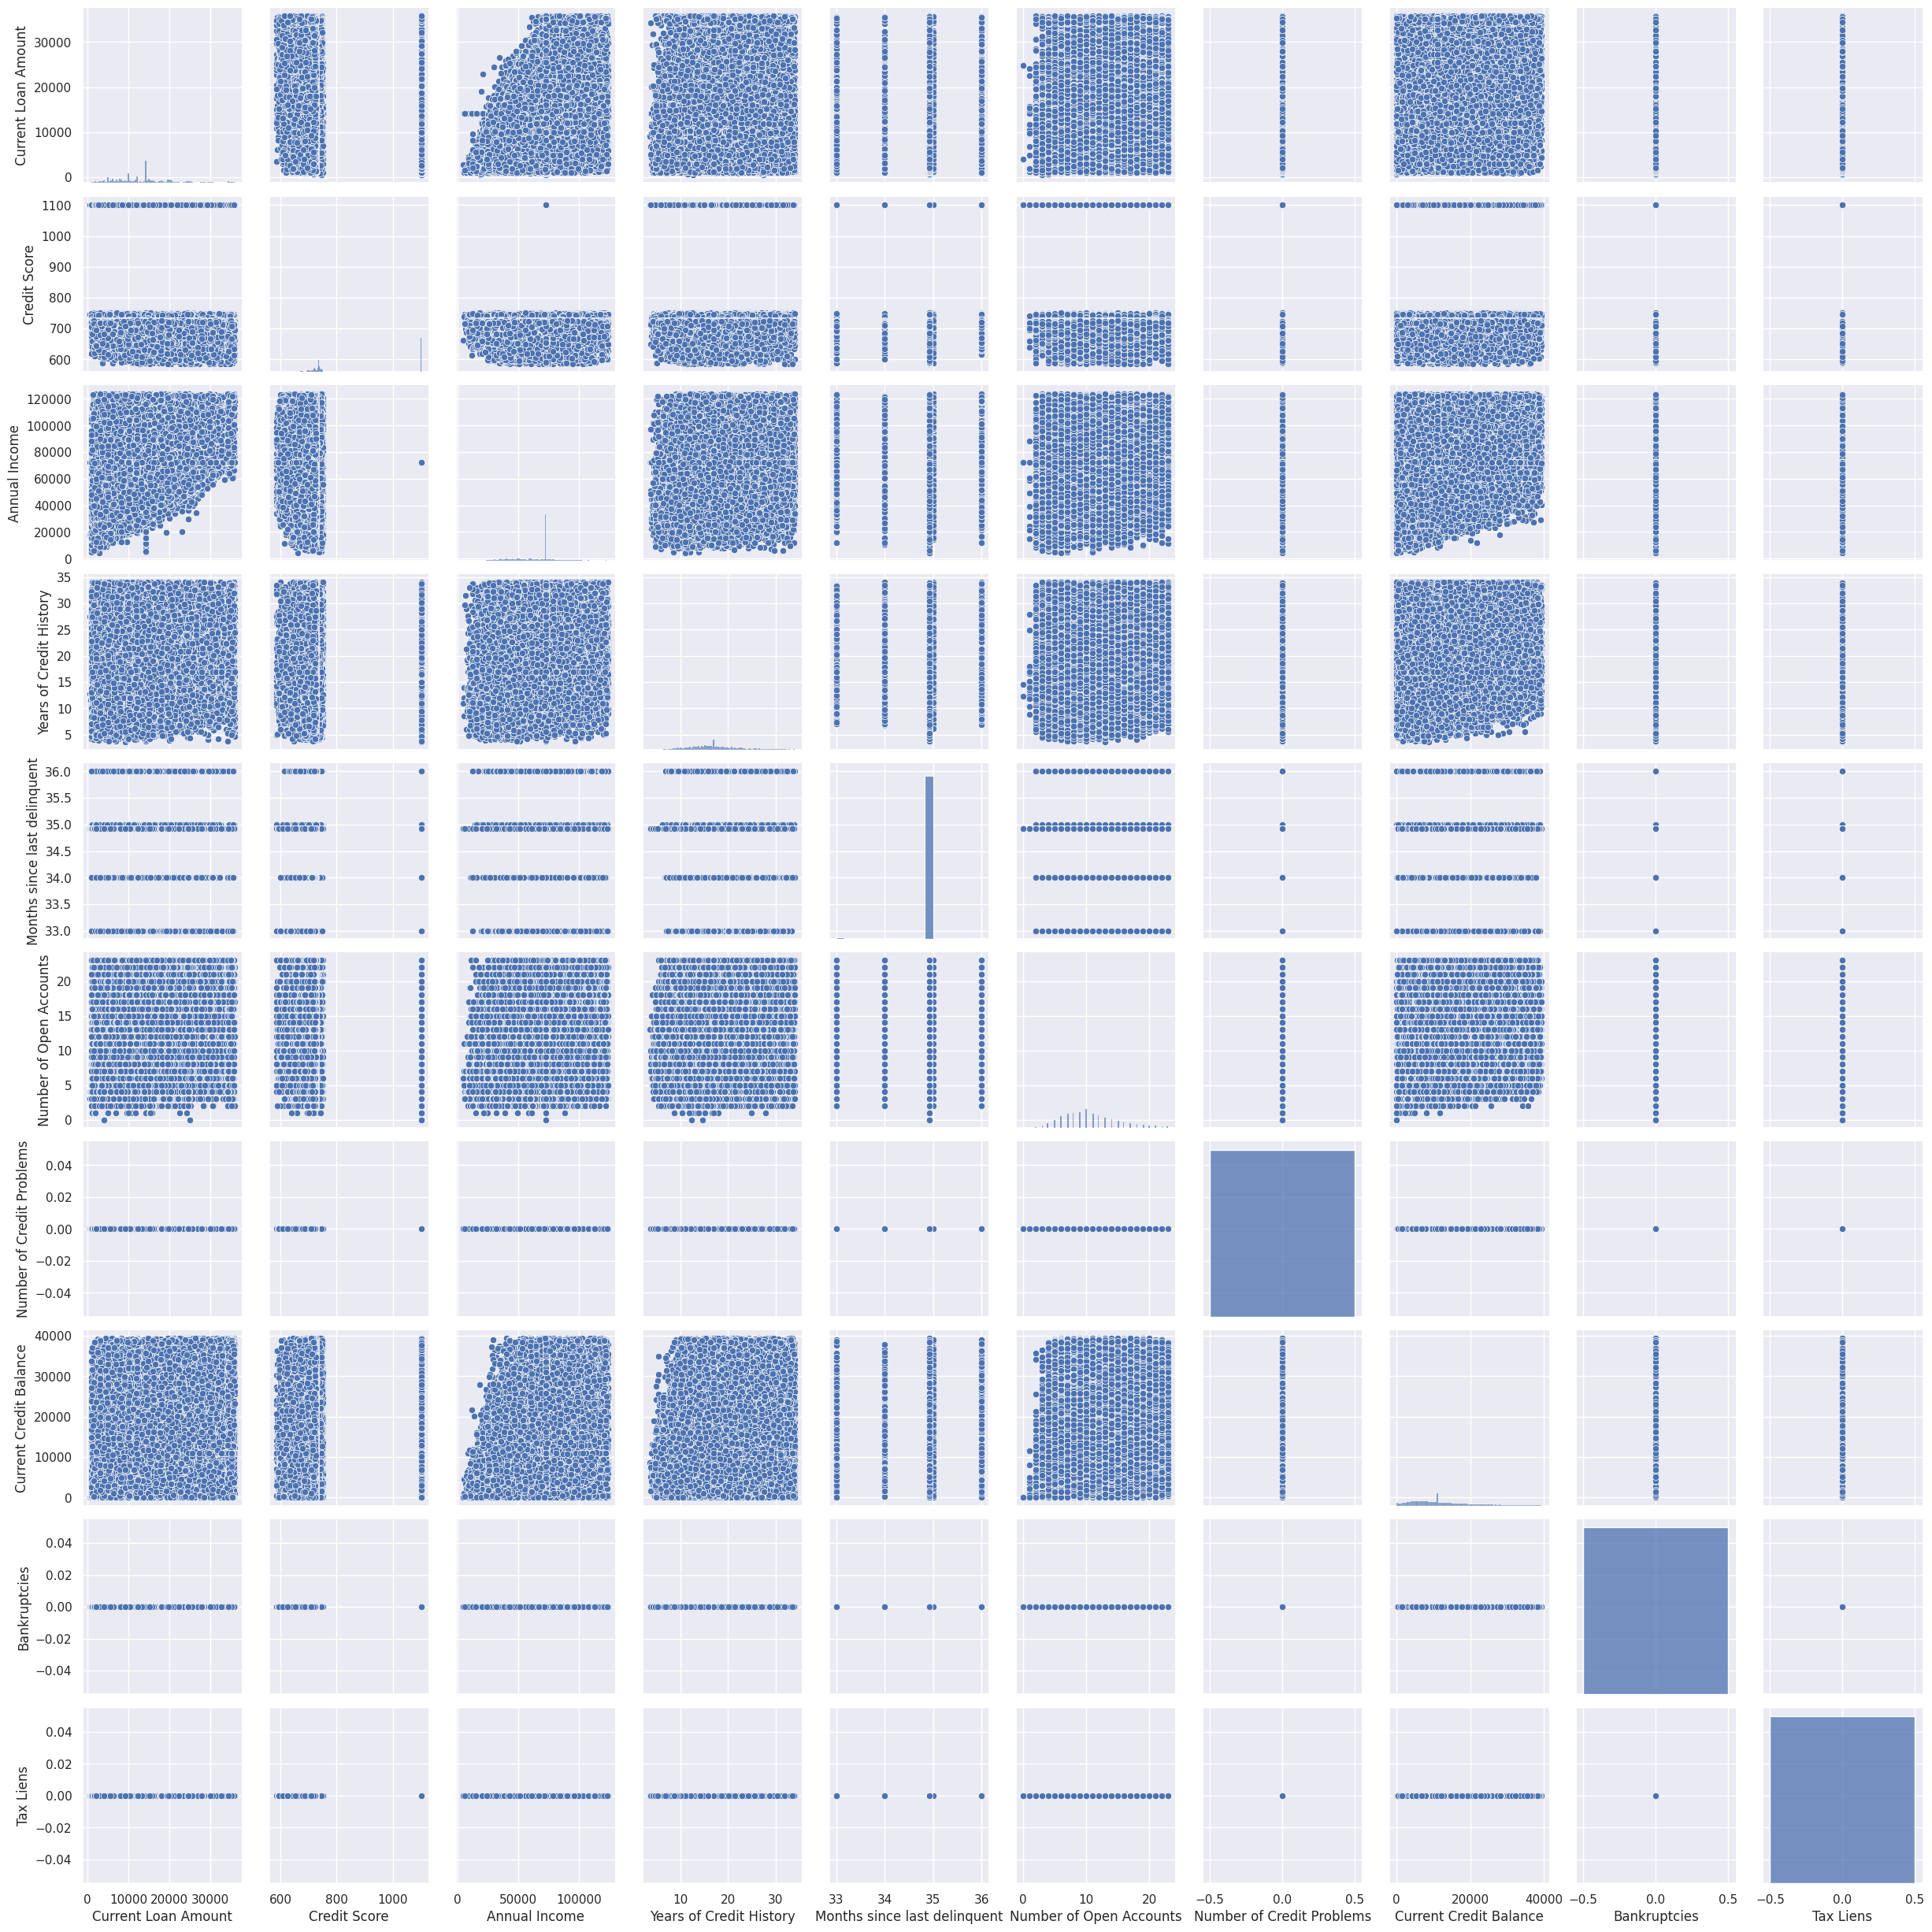

In [41]:

# Get numerical columns
numerical_cols = hf6.select_dtypes(include=np.number).columns

# Create scatter plots for all pairs of numerical columns
sns.pairplot(hf6[numerical_cols])
plt.show()

# **4. CALCULATE THE CORRELATIONS MATRIX EXCLUDING NON-NUMERIC COLUMNS**

                              Current Loan Amount  Credit Score  \
Current Loan Amount                      1.000000     -0.044783   
Credit Score                            -0.044783      1.000000   
Annual Income                            0.365839      0.172499   
Years of Credit History                  0.159172      0.012067   
Months since last delinquent             0.002478      0.002668   
Number of Open Accounts                  0.191699     -0.003213   
Number of Credit Problems                     NaN           NaN   
Current Credit Balance                   0.381959     -0.008000   
Bankruptcies                                  NaN           NaN   
Tax Liens                                     NaN           NaN   

                              Annual Income  Years of Credit History  \
Current Loan Amount                0.365839                 0.159172   
Credit Score                       0.172499                 0.012067   
Annual Income                      1.000000   

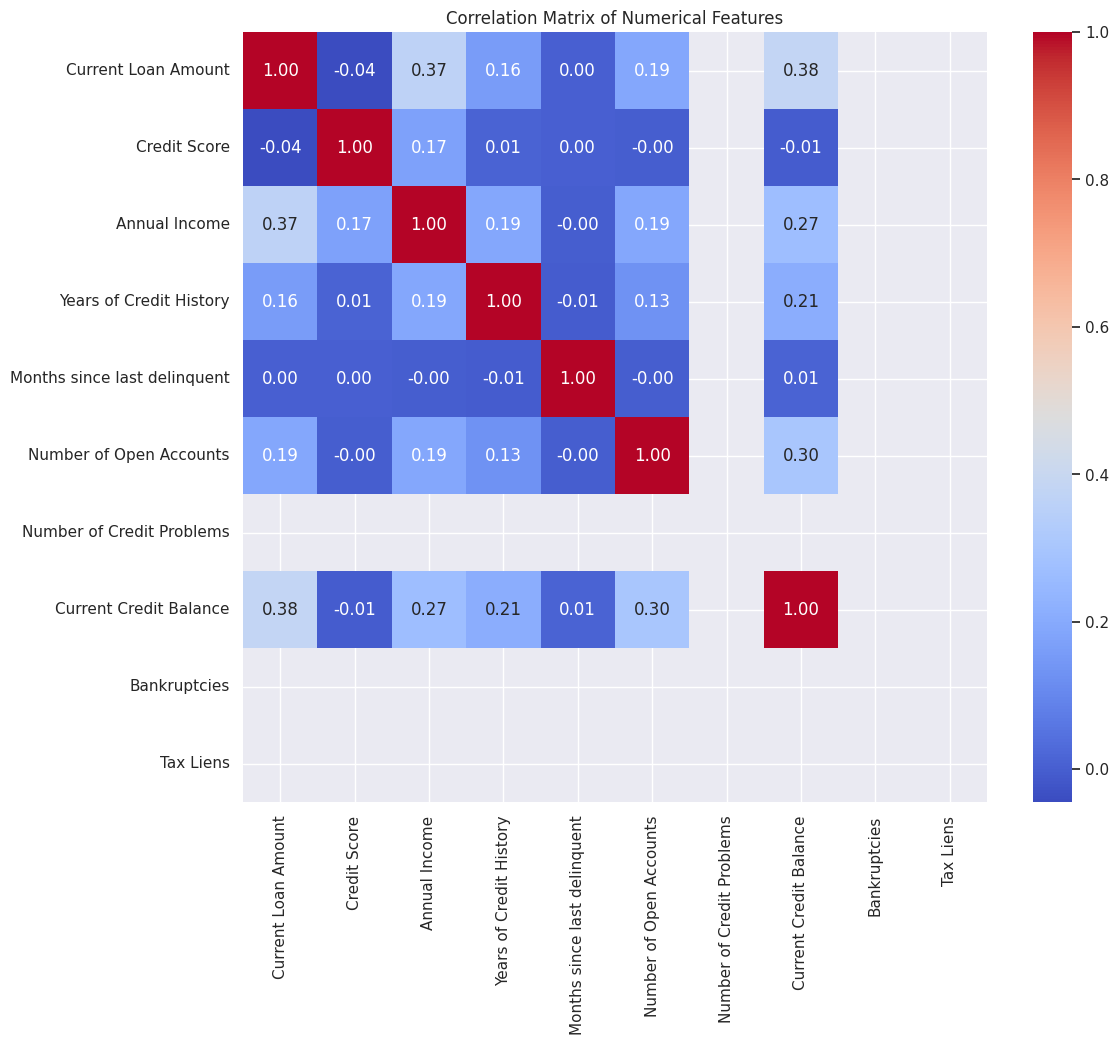

In [42]:
correlation_matrix = hf6.select_dtypes(include=np.number).corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **4. CALCULATE HIGH CORRELATION WITH THRESHOLD 0.6**

In [43]:
correlation_matrix = hf6.select_dtypes(include=np.number).corr()
# Set a threshold for high correlation (e.g., 0.6)
threshold = 0.6
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.loc[col1, col2]
        if abs(correlation) >= threshold:  # Using >= for threshold comparison
            highly_correlated_pairs.append((col1, col2, correlation))
print("Highly Correlated Pairs (Threshold >=", threshold, "):")
for col1, col2, correlation in highly_correlated_pairs:
    print(f"- {col1} and {col2}: {correlation:.2f}")

# Create a sub-dataframe with only highly correlated features
highly_correlated_features = set()
for col1, col2, _ in highly_correlated_pairs:
    highly_correlated_features.add(col1)
    highly_correlated_features.add(col2)

# Check if there are any highly correlated features before proceeding
if highly_correlated_features:
    highly_correlated_df = hf6[list(highly_correlated_features)]

    # Calculate the correlation matrix for the sub-dataframe
    highly_correlated_matrix = highly_correlated_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(highly_correlated_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Highly Correlated Features (Threshold >= {threshold})')
    plt.show()
else:
    print(f"No highly correlated features found with the given threshold (>= {threshold}).")

Highly Correlated Pairs (Threshold >= 0.6 ):
No highly correlated features found with the given threshold (>= 0.6).


In [44]:
df = pd.read_csv("/content/drive/MyDrive/Colab/dataset.csv")

<ipython-input-44-cdc2a2096ab3>:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab/dataset.csv")


In [45]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


# **5. APPLYING RULE COVERT 1,2,3,4 YEARS TO TWO-FOUR YEARS AND OTHERS RULES**

In [46]:

def categorize_years(years_str):
    """Categorizes years of experience based on string input."""
    try:
        # Check for "10+ years" first
        if years_str == "10+ years":
            return "Above ten years"

        # If not "10+ years", proceed with other cases
        years = years_str.split()[0]  # Extract the first part

        if years.isdigit():  # Check if it's a numerical value
            years = int(years)
            if 2 <= years <= 4:
                return "two-four years"
            elif 5 <= years <= 7:
                return "five-seven years"
            elif 8 <= years <= 9:
                return "eight-nine years"
            else:
                return "<year"

        elif years == "<" or years.lower() == "n/a":
            return "<year"
        else:
            return "other"
    except (ValueError, AttributeError):
        return "other"
df['Years in current job'] = df['Years in current job'].apply(categorize_years)
print(df['Years in current job'].value_counts())

Years in current job
Above ten years     34551
two-four years      26119
five-seven years    20055
<year               16230
eight-nine years     9459
other                4693
Name: count, dtype: int64


In [47]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,<year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,Above ten years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,eight-nine years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,two-four years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,Above ten years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,Above ten years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,Above ten years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,five-seven years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,Above ten years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0
